# COVID-19 Vaccinations by County

## Data Understanding

A full explanation of the different column names can be found [here](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh/about_data). Below, we include some of the more important labels.

* [MMWR Week](https://ndc.services.cdc.gov/wp-content/uploads/MMWR_Week_overview.pdf), under `MMWR_week`, refers to the epidemiological ordering of weeks of the year, starting on Sunday and going until Saturday. These weeks are generally numbered 1-52.
* `Completeness_pct` corresponds to "the proportion of people with a completed primary series whose Federal Information Processing Standards (FIPS) code is reported and matches a valid county FIPS code in the jurisdiction."
    * Someone has completed their **primary series** if they have received a "second dose of a two-dose vaccine or one dose of a single-dose vaccine."
* There are then a number of different age brackets: the total number and percentage of individuals vaccinated who are above the ages of 5, 12, 18, and 64. So, for example, we have `Administered_Dose1_Recip`; the percentage form of that, `Administered_Dose1_Pop_Pct`; the raw numbers of those over 5 years old, `Administered_Dose1_Recip_5Plus`, and so on.
* `Booster_Doses` indicates the number of individuals who have completed a primary series and received a booster dose.

* `SVI` refers to the [social vulnerability index](https://www.atsdr.cdc.gov/placeandhealth/svi/index.html).
* `Metro_status` tells us whether someone lives within a metro area. We have a number of columns normalizing our data against both SVI and metro status.
* `Census2019` and associated columns bring over data from the 2019 census.
* We also have data about those receiving the bivalent booster (authorized by the FDA [late summer 2022](https://www.fda.gov/news-events/press-announcements/coronavirus-covid-19-update-fda-authorizes-moderna-pfizer-biontech-bivalent-covid-19-vaccines-use)), although this data only appears in age-binned categories.


---

Other useful information and links
* [FIPS codes](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html#ti1187912100)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/COVID-19_Vaccinations_in_the_United_States_County_20231222.csv")
df.head()

/var/folders/gf/gqtw2hsd3xx5_9tt2z47xflr0000gn/T/ipykernel_76802/900414909.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/COVID-19_Vaccinations_in_the_United_States_County_20231222.csv")


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,05/10/2023,55129,19,Washburn County,WI,96.7,11123.0,70.8,11097.0,73.9,...,12758.0,4304.0,3978.0,26.5,3955.0,28.6,3899.0,30.6,2588.0,60.1
1,05/10/2023,19173,19,Taylor County,IA,97.3,3149.0,51.4,3145.0,55.0,...,4687.0,1392.0,841.0,14.7,841.0,16.3,834.0,17.8,588.0,42.2
2,05/10/2023,36059,19,Nassau County,NY,97.5,1391226.0,95.0,1384503.0,95.0,...,1065968.0,246690.0,236202.0,18.4,231748.0,19.8,224931.0,21.1,109947.0,44.6
3,05/10/2023,48281,19,Lampasas County,TX,98.9,11678.0,54.5,11660.0,57.4,...,16799.0,4322.0,1951.0,9.6,1947.0,10.5,1925.0,11.5,1229.0,28.4
4,05/10/2023,26145,19,Saginaw County,MI,94.0,104075.0,54.6,NaN,NaN,...,149676.0,37414.0,15618.0,8.7,15448.0,9.4,15112.0,10.1,7921.0,21.2


In [3]:
df.groupby(by="Recip_State")["Recip_County"].value_counts()



Recip_State  Recip_County              
AK           Aleutians East Borough        598
             Aleutians West Census Area    598
             Yakutat City and Borough      598
             Yukon-Koyukuk Census Area     598
             Wrangell City and Borough     598
                                          ... 
WY           Teton County                  598
             Uinta County                  598
             Washakie County               598
             Weston County                 598
             Unknown County                595
Name: count, Length: 3284, dtype: int64

In [10]:
saginaw_mi = df[(df["Recip_County"] == "Saginaw County") & (df["Recip_State"] == "MI")]
saginaw_mi.head()



,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
4,05/10/2023,26145,19,Saginaw County,MI,94.0,104075.0,54.6,NaN,NaN,...,149676.0,37414.0,15618.0,8.7,15448.0,9.4,15112.0,10.1,7921.0,21.2
4563,05/03/2023,26145,18,Saginaw County,MI,94.0,104069.0,54.6,NaN,NaN,...,149676.0,37414.0,15564.0,8.7,15394.0,9.4,15059.0,10.1,7884.0,21.1
7366,04/26/2023,26145,17,Saginaw County,MI,94.0,104066.0,54.6,NaN,NaN,...,149676.0,37414.0,15535.0,8.7,15366.0,9.4,15034.0,10.0,7864.0,21.0
10458,04/19/2023,26145,16,Saginaw County,MI,94.0,104063.0,54.6,NaN,NaN,...,149676.0,37414.0,15504.0,8.6,15336.0,9.4,15004.0,10.0,7843.0,21.0
15810,04/12/2023,26145,15,Saginaw County,MI,94.1,104065.0,54.6,NaN,NaN,...,149676.0,37414.0,15523.0,8.6,15357.0,9.4,15025.0,10.0,7840.0,21.0


In [14]:
saginaw_mi["Date"] = pd.to_datetime(saginaw_mi["Date"])
saginaw_mi.info()


<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 4 to 1962522
Data columns (total 80 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     598 non-null    datetime64[ns]
 1   FIPS                                     598 non-null    object        
 2   MMWR_week                                598 non-null    int64         
 3   Recip_County                             598 non-null    object        
 4   Recip_State                              598 non-null    object        
 5   Completeness_pct                         598 non-null    float64       
 6   Administered_Dose1_Recip                 598 non-null    float64       
 7   Administered_Dose1_Pop_Pct               598 non-null    float64       
 8   Administered_Dose1_Recip_5Plus           214 non-null    float64       
 9   Administered_Dose1_Recip_5PlusPop_Pct    214

/var/folders/gf/gqtw2hsd3xx5_9tt2z47xflr0000gn/T/ipykernel_76802/1480338031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saginaw_mi["Date"] = pd.to_datetime(saginaw_mi["Date"])


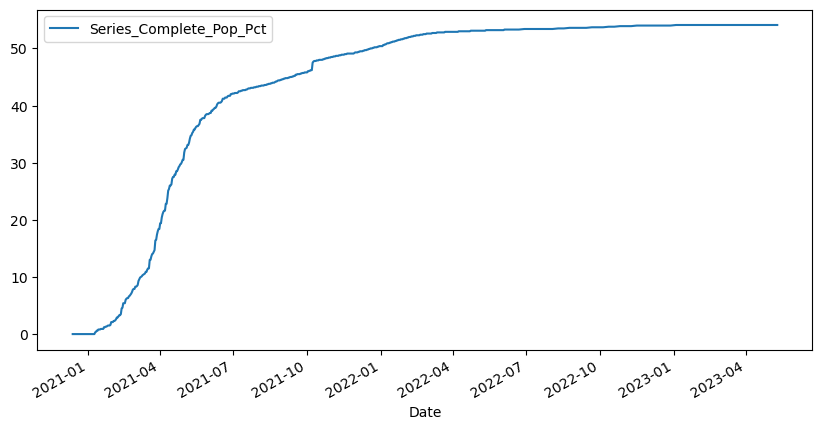

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = saginaw_mi.plot(x="Date", y="Series_Complete_Pop_Pct", ax=ax)

## Presidential Election Data

In [19]:
pol = pd.read_csv("../data/2020_US_County_Level_Presidential_Results.csv")
pol.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


In [21]:
# adding a state_abbrev column
state_abbrevs = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

pol["state_abbrev"] = pol["state_name"].map(state_abbrevs)
pol.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,state_abbrev
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,AL
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,AL
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,AL
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,AL
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,AL


In [22]:
pol.groupby(by="state_abbrev")["county_name"].value_counts()

state_abbrev  county_name    
AK            District 1         1
              District 10        1
              District 33        1
              District 34        1
              District 35        1
                                ..
WY            Teton County       1
              Uinta County       1
              Washakie County    1
              Albany County      1
              Weston County      1
Name: count, Length: 3152, dtype: int64

In [23]:
pol["votes_third_party"] = pol["total_votes"] - pol["votes_dem"] - pol["votes_gop"]
pol["per_third_party"] = pol["votes_third_party"] / pol["total_votes"]
pol.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,state_abbrev,votes_third_party,per_third_party
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,AL,429,0.015448
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,AL,1557,0.014196
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,AL,80,0.007606
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,AL,84,0.008755
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,AL,237,0.008591
